<a href="https://colab.research.google.com/github/PedroHenrique0214/health_diet/blob/main/mvp_analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Este projeto realiza uma análise aprofundada sobre a qualidade dos alimentos e a distribuição de uma dieta saudável ao redor do mundo, utilizando dados da The Food and Agriculture Organization (FAO), uma agência das Nações Unidas que lidera os esforços internacionais para combater a fome. A análise examina o custo de uma alimentação saudável ao longo de cinco anos (2017 até 2021), destacando como os preços variaram globalmente e no Brasil nesse período.

Além disso, a análise compara os tipos de alimentos para identificar quais produtos têm maior impacto no custo de uma dieta saudável e quais sofreram os maiores aumentos de preço ao longo dos anos. O projeto também investiga o custo médio de uma dieta saudável por pessoa ao longo dos anos, destacando os países onde a situação é mais crítica, com uma comparação entre números absolutos e a porcentagem da população afetada.

# Conhecendo os dados

In [ ]:
# Bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Acessando meu google driva - ISSO VAI SER APAGADO NO GITHUB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# URL dos dados do mundo todo
path_world = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_All_Data_(Normalized).csv"

# Lê o arquivo na URL e exibindo as primeiras linhas
df_world = pd.read_csv(path_world, encoding='latin-1')
df_world.head(10)


,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,2017,2017,PPP dollar per person per day,3.04,E
1,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,2018,2018,PPP dollar per person per day,3.13,E
2,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,2019,2019,PPP dollar per person per day,3.32,E
3,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,2020,2020,PPP dollar per person per day,3.4,E
4,3,'008,Albania,7004,Cost of a healthy diet (PPP dollar per person ...,6226,Value,2021,2021,PPP dollar per person per day,3.55,E
5,3,'008,Albania,7007,Cost of starchy staples,6226,Value,2017,2017,PPP dollar per person per day,0.6,E
6,3,'008,Albania,7007,Cost of starchy staples,6226,Value,2021,2021,PPP dollar per person per day,0.48,E
7,3,'008,Albania,7008,Cost of animal source foods,6226,Value,2017,2017,PPP dollar per person per day,1.2,E
8,3,'008,Albania,7008,Cost of animal source foods,6226,Value,2021,2021,PPP dollar per person per day,1.15,E
9,3,'008,Albania,7009,"Cost of legumes, nuts and seeds",6226,Value,2017,2017,PPP dollar per person per day,0.44,E


### Sobre os dados

Segundo o site da The Food and Agriculture Organization os  indicadores sobre o custo e a acessibilidade de uma dieta saudável são estimados em cada país e mostram o acesso físico e econômico da população aos alimentos locais mais baratos disponíveis para atender às necessidades de uma dieta saudável. Os indicadores utilizam os preços observados de alimentos no varejo e as distribuições de renda para fornecer uma medida prática do acesso das pessoas aos alimentos locais disponíveis nas proporções necessárias para uma alimentação saudável. Esses indicadores ajudam a monitorar o progresso em direção ao objetivo de transformar os sistemas agroalimentares, promovendo a "agricultura sensível à nutrição". Por isso é importante realizar essa análise para podermos observar quais lugares estão mais afetados pela falta de uma alimentação saudável, para as instituições responsáveis aumentarem os esforços.

In [ ]:
# Informações sobre os dados
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4509 entries, 0 to 4508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        4509 non-null   object 
 1   Item        4509 non-null   object 
 2   Element     4509 non-null   object 
 3   Year Code   4509 non-null   int64  
 4   Year        4509 non-null   int64  
 5   Unit        4509 non-null   object 
 6   Value       4192 non-null   float64
 7   Continente  4509 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 317.0+ KB


# Tratamento dos Dados

Nessa etapa, foi feito o tratamento dos dados do dataset, para garantir a eficiência e qualidade da análise.

In [ ]:
# Visualizando todas as colunas
df_world.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag'],
      dtype='object')

In [ ]:
# Jogando fora as colunas que não serão necessárias
df_world.drop(['Area Code (M49)', 'Item Code', 'Element Code', 'Flag'], axis=1, inplace=True)
df_world.head()

,Area Code,Area,Item,Element,Year Code,Year,Unit,Value
0,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2017,2017,PPP dollar per person per day,3.04
1,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2018,2018,PPP dollar per person per day,3.13
2,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2019,2019,PPP dollar per person per day,3.32
3,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2020,2020,PPP dollar per person per day,3.4
4,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2021,2021,PPP dollar per person per day,3.55


In [ ]:
# Quantidade de códigos de área diferentes
df_world["Area Code"].unique().size

204

### Adicionando Coluna
Gostaria de uma coluna indicando o continente de cada país. Para isso vou utilizar os códigos de área para pegar a informação em outras tabelas disponibilizadas no site da 'Food and Agriculture Organization of the United Station'.

In [ ]:
# URL dos dados de cada continente
path_america = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_Americas.csv"
path_europa = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_Europe.csv"
path_africa = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_Africa.csv"
path_oceania = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_Oceania.csv"
path_asia = "/content/drive/MyDrive/MVP/Análise de Dados/Cost_Affordability_Healthy_Diet_(CoAHD)_E_Asia.csv"

In [ ]:
# Códigos da America
df_america = pd.read_csv(path_america, encoding="latin-1")
df_america['Area Code'].unique()

array([  8,   9,  22,  12,  23,  17,  19,  21, 239,  33,  36,  40,  44,
        48, 279,  55,  56,  58,  86,  91,  93,  95, 109, 138, 157, 166,
       169, 170, 188, 189, 191, 280, 207, 220, 224, 231, 234])

In [ ]:
# Códigos da Europa
df_europa = pd.read_csv(path_europa, encoding="latin-1")
df_europa['Area Code'].unique()

array([  3,  11,  57, 255,  80,  27,  98, 167,  54,  63,  67,  68,  79,
        84,  97,  99, 104, 106, 119, 126, 256, 134, 273, 150, 154, 162,
       173, 174, 146, 183, 185, 272, 199, 198, 203, 210, 211, 229])

In [ ]:
# Códigos da Africa
df_africa = pd.read_csv(path_africa, encoding="latin-1")
df_africa['Area Code'].unique()

array([  4,   7,  53,  20, 233,  29,  35,  32,  37,  39,  46, 107, 250,
        72,  59,  61, 209, 238,  74,  75,  81,  90, 175, 114, 122, 123,
       129, 130, 133, 136, 137, 143, 144, 147, 158, 159, 184, 193, 195,
       196, 197, 202, 276, 222, 226, 215, 251, 181])

In [ ]:
# Código da Oceania
df_oceania = pd.read_csv(path_oceania, encoding="latin-1")
df_oceania['Area Code'].unique()

array([ 10,  66, 156])

In [ ]:
# Código da Asia
df_asia = pd.read_csv(path_asia, encoding="latin-1")
df_asia['Area Code'].unique()

array([  1,  52,  13,  16,  18,  26, 115,  96,  41, 214,  50, 100, 101,
       102, 103, 105, 110, 112, 108, 118, 113, 120, 131, 132, 141,  28,
       149, 221, 165, 299, 171, 179, 117, 194, 200,  38, 208, 216, 223,
       225, 237])

In [ ]:
# Dicionário de continentes e seus respectivos códigos
continentes = {
    "America": [  8,   9,  22,  12,  23,  17,  19,  21, 239,  33,  36,  40,  44,
        48, 279,  55,  56,  58,  86,  91,  93,  95, 109, 138, 157, 166,
       169, 170, 188, 189, 191, 280, 207, 220, 224, 231, 234],
    "Europa": [  3,  11,  57, 255,  80,  27,  98, 167,  54,  63,  67,  68,  79,
        84,  97,  99, 104, 106, 119, 126, 256, 134, 273, 150, 154, 162,
       173, 174, 146, 183, 185, 272, 199, 198, 203, 210, 211, 229],
    "Africa": [  4,   7,  53,  20, 233,  29,  35,  32,  37,  39,  46, 107, 250,
        72,  59,  61, 209, 238,  74,  75,  81,  90, 175, 114, 122, 123,
       129, 130, 133, 136, 137, 143, 144, 147, 158, 159, 184, 193, 195,
       196, 197, 202, 276, 222, 226, 215, 251, 181],
    "Oceania": [ 10,  66, 156],
    "Asia": [  1,  52,  13,  16,  18,  26, 115,  96,  41, 214,  50, 100, 101,
       102, 103, 105, 110, 112, 108, 118, 113, 120, 131, 132, 141,  28,
       149, 221, 165, 299, 171, 179, 117, 194, 200,  38, 208, 216, 223,
       225, 237]
}

# Função para mapear o código para o continente
def mapeando_continente(area_code):
  for continente, paises in continentes.items():
    if area_code in paises:
      return continente
  return "Other"

# Aplicando a função para adicionar a nova coluna continente
df_world["Continente"] = df_world["Area Code"].apply(mapeando_continente)
df_world.head()

,Area Code,Area,Item,Element,Year Code,Year,Unit,Value,Continente
0,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2017,2017,PPP dollar per person per day,3.04,Europa
1,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2018,2018,PPP dollar per person per day,3.13,Europa
2,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2019,2019,PPP dollar per person per day,3.32,Europa
3,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2020,2020,PPP dollar per person per day,3.4,Europa
4,3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2021,2021,PPP dollar per person per day,3.55,Europa


In [ ]:
# A coluna 'Area Code' é agora desnecessário
df_world.drop(["Area Code"], axis=1, inplace=True)

Agora irei apagar do nosso dataset tudo que foi considerado como 'outro', pois se trata de valores agregados de regiôes ou blocos econômicos que não irei utilizar em minha análise.

In [ ]:
# Apagando o que for considerável 'outro'
df_world = df_world[df_world["Continente"]!="Other"]

In [ ]:
# Vendo informações dos nossos dados
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4509 entries, 0 to 4508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Area        4509 non-null   object
 1   Item        4509 non-null   object
 2   Element     4509 non-null   object
 3   Year Code   4509 non-null   int64 
 4   Year        4509 non-null   int64 
 5   Unit        4509 non-null   object
 6   Value       4192 non-null   object
 7   Continente  4509 non-null   object
dtypes: int64(2), object(6)
memory usage: 317.0+ KB


Ops... Temos que transformar nosso `'Value'` em float.

In [ ]:
# Tratando os erros de conversão
df_world['Value'] = df_world['Value'].replace('<0.1', 0.1)

# Transformando a coluna em float
df_world['Value'] = df_world['Value'].astype(float)


## Verificando valores nulos

Verificando a existência de valores nulos e tratando caso necessário.

In [ ]:
df_world.isnull().sum()

,0
Area,0
Item,0
Element,0
Year Code,0
Year,0
Unit,0
Value,317
Continente,0


In [ ]:
# Listando todos os países que possuem valores nulos
df_nulos = df_world[df_world["Value"].isnull()]
df_nulos["Area"].unique()

array(['Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Bahrain',
       'Bermuda', 'British Virgin Islands', 'Brunei Darussalam',
       'Cambodia', 'Cayman Islands', 'China, Hong Kong SAR',
       'China, Taiwan Province of', 'Curaçao', 'Dominica',
       'Equatorial Guinea', 'Guyana', 'Haiti',
       'Iran (Islamic Republic of)', 'Kuwait', 'Myanmar', 'New Zealand',
       'Oman', 'Qatar', 'Saint Kitts and Nevis',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Zimbabwe'], dtype=object)

In [ ]:
# Vamos pegar um país para usar de exemplo
df_world[df_world["Area"]=="China, Hong Kong SAR"]

,Area,Item,Element,Year Code,Year,Unit,Value,Continente
972,"China, Hong Kong SAR",Cost of a healthy diet (PPP dollar per person ...,Value,2017,2017,PPP dollar per person per day,3.64,Asia
973,"China, Hong Kong SAR",Cost of a healthy diet (PPP dollar per person ...,Value,2018,2018,PPP dollar per person per day,3.81,Asia
974,"China, Hong Kong SAR",Cost of a healthy diet (PPP dollar per person ...,Value,2019,2019,PPP dollar per person per day,3.93,Asia
975,"China, Hong Kong SAR",Cost of a healthy diet (PPP dollar per person ...,Value,2020,2020,PPP dollar per person per day,4.13,Asia
976,"China, Hong Kong SAR",Cost of a healthy diet (PPP dollar per person ...,Value,2021,2021,PPP dollar per person per day,4.43,Asia
977,"China, Hong Kong SAR",Cost of starchy staples,Value,2017,2017,PPP dollar per person per day,0.74,Asia
978,"China, Hong Kong SAR",Cost of starchy staples,Value,2021,2021,PPP dollar per person per day,0.86,Asia
979,"China, Hong Kong SAR",Cost of animal source foods,Value,2017,2017,PPP dollar per person per day,1.03,Asia
980,"China, Hong Kong SAR",Cost of animal source foods,Value,2021,2021,PPP dollar per person per day,1.21,Asia
981,"China, Hong Kong SAR","Cost of legumes, nuts and seeds",Value,2017,2017,PPP dollar per person per day,0.30,Asia


Muitos países aparecem na lista de dados faltantes, desses, grande parte é apenas para dados sobre a quantidade de pessoas sem acesso a uma alimentação saudável.

**Então como vou cuidar disso?**

### Vamos separar nossa tabela...

In [ ]:
# Observando os dados contínuos
df_world.describe()

,Year Code,Year,Value
count,4509.000000,4509.000000,4192.000000
mean,2019.000000,2019.000000,9.804074
std,1.699862,1.699862,36.585778
min,2017.000000,2017.000000,0.050000
25%,2017.000000,2017.000000,0.480000
50%,2019.000000,2019.000000,1.100000
75%,2021.000000,2021.000000,3.832500
max,2021.000000,2021.000000,941.100000


Nossa tabela tem algumas analises diferentes dentro dela, gerando valores bastantes divergentes na coluna 'Value'.

A melhor solução é separar nosso dataset para realizar diferentes análises. Vou separar em:
- Custo dos alimentos;
- Porcentagem da população sem acesso a uma alimentação saudável;
- Número de pessoas sem acesso a uma alimentação saudável.

In [ ]:
# Visualizando diferentes análises
df_world["Item"].unique()

array(['Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats',
       'Percentage of the population unable to afford a healthy diet (percent)',
       'Number of people unable to afford a healthy diet (million)'],
      dtype=object)

In [ ]:
# Separando os custos de alimentos do nosso dataset
custos = ['Cost of a healthy diet (PPP dollar per person per day)',
          'Cost of starchy staples', 'Cost of animal source foods',
          'Cost of legumes, nuts and seeds', 'Cost of vegetables',
          'Cost of fruits', 'Cost of oils and fats']


# Criando nossa tabela mundial de custos de alimentos
df_world_cost = df_world[df_world["Item"].isin(custos)]

In [ ]:
# Criando as tabelas de Pessoas sem acesso a uma alimentação saudável, porcentagem/total.

# Em porcentagem
df_world_percent = df_world[df_world["Item"]=='Percentage of the population unable to afford a healthy diet (percent)']

# Números totais
df_world_total = df_world[df_world["Item"]== 'Number of people unable to afford a healthy diet (million)']

### Tratando os dados ausentes agora com nossa tabela distribuida

In [ ]:
# Valores ausentes de custo de alimentos
df_world_cost.isnull().sum()

,0
Area,0
Item,0
Element,0
Year Code,0
Year,0
Unit,0
Value,65
Continente,0


In [ ]:
# Países com valores ausentes
df_nulos_cost = df_world_cost[df_world_cost["Value"].isnull()]
df_nulos_cost["Area"].unique()

array(['Argentina', 'Bahamas', 'China, Taiwan Province of', 'Guyana',
       'Haiti', 'Iran (Islamic Republic of)', 'Myanmar',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'Zimbabwe'], dtype=object)

Vemos que a lista diminuiu consideravelmente. Assim é melhor, pois perdemos menos dados em uma análise futura.

Agora não te jeito, **vou apagar os dados ausentes do custo**, pois não temos como realizar um tratamento confiável para nossa análise.

> Possibilidade: Um possível tratamento para os dados de cada país seria fazer a média do valor dos produtos no continente onde se encontra, porém, cada país tem uma sistema muito específico de econômia e política, não sendo tão simples fazer a comparação com vizinhos continentais.

In [ ]:
# Eliminando valores nulos
df_world_cost.dropna(axis=0, inplace=True)
df_world_cost.isnull().sum()

,0
Area,0
Item,0
Element,0
Year Code,0
Year,0
Unit,0
Value,0
Continente,0


In [ ]:
# Realizando o mesmo procedimento com as outras tabelas

# Verificando os valores ausentes
df_nulos_percent = df_world_percent[df_world_percent["Value"].isnull()]
df_nulos_percent["Area"].unique()

array(['Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Bahrain',
       'Bermuda', 'British Virgin Islands', 'Brunei Darussalam',
       'Cambodia', 'Cayman Islands', 'China, Hong Kong SAR',
       'China, Taiwan Province of', 'Curaçao', 'Dominica',
       'Equatorial Guinea', 'Kuwait', 'New Zealand', 'Oman', 'Qatar',
       'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
       'Saudi Arabia', 'Singapore', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Zimbabwe'], dtype=object)

In [ ]:
# Quero verificar se tem a mesma quantidade de dados ausentes
df_world_percent.isnull().sum() == df_world_total.isnull().sum()

,0
Area,True
Item,True
Element,True
Year Code,True
Year,True
Unit,True
Value,True
Continente,True


In [ ]:
# Apagando ambos os valores ausentes
df_world_percent.dropna(axis=0, inplace=True)
df_world_total.dropna(axis=0, inplace=True)

## Verificando Outliers e observando a distribuição dos dados

Agora vamos verificar se existem valores outliers, e se tiver, uma estratégia para tratá-los.

Text(0.5, 0, 'Preço (Pessoa/dia)')

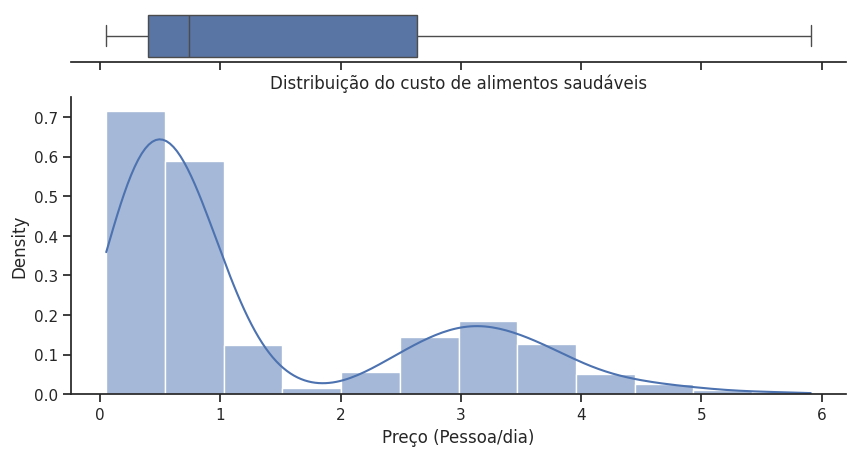

In [ ]:
# Plotando o boxplot para verificar nossos outliers

# Configurando o estilo
sns.set(style="ticks")

# Plotando o gráfico dos custos
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df_world_cost, x="Value", ax=ax_box)
sns.histplot(data=df_world_cost, x="Value", bins=12, kde=True, stat='density', ax=ax_hist)

# Ajustando o gráfico
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set(yticks=[])
plt.title("Distribuição do custo de alimentos saudáveis")
plt.xlabel("Preço (Pessoa/dia)")

Não apresenta nenhum outlier.

Text(0.5, 0, 'Pessoas (Milhão)')

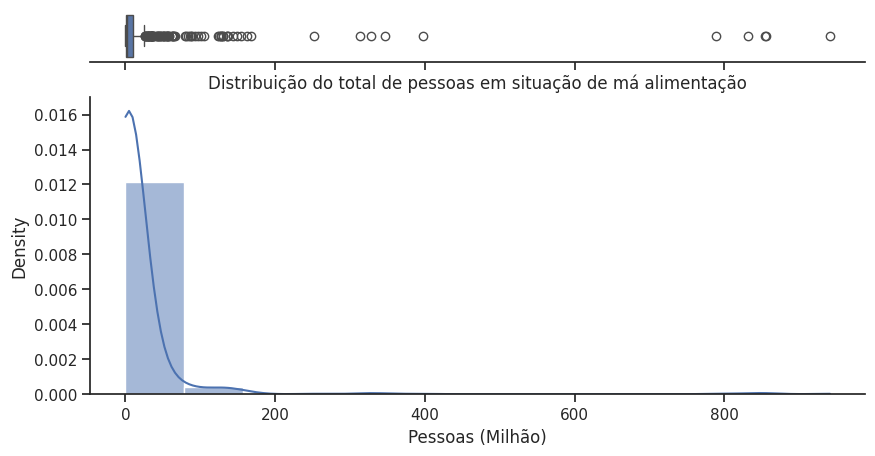

In [ ]:
# Plotando o boxplot para verificar nossos outliers

# Plotando o gráfico de números absoluto de pessoas sem acesso a alimentação saudável
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 5), gridspec_kw={"height_ratios": (.15, .85)})


sns.boxplot(data=df_world_total, x="Value", ax=ax_box)
sns.histplot(data=df_world_total, x="Value", bins=12, kde=True, stat='density', ax=ax_hist)

# Ajustando o gráfico
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set(yticks=[])
plt.title("Distribuição do total de pessoas em situação de má alimentação")
plt.xlabel("Pessoas (Milhão)")

Interessante, vamos verificar que países são esses.

In [ ]:
df_world_total[df_world_total["Value"]>200]

,Area,Item,Element,Year Code,Year,Unit,Value,Continente
1021,"China, mainland",Number of people unable to afford a healthy di...,Value,2017,2017,million No,398.1,Asia
1022,"China, mainland",Number of people unable to afford a healthy di...,Value,2018,2018,million No,346.2,Asia
1023,"China, mainland",Number of people unable to afford a healthy di...,Value,2019,2019,million No,313.1,Asia
1024,"China, mainland",Number of people unable to afford a healthy di...,Value,2020,2020,million No,327.6,Asia
1025,"China, mainland",Number of people unable to afford a healthy di...,Value,2021,2021,million No,251.3,Asia
2020,India,Number of people unable to afford a healthy di...,Value,2017,2017,million No,941.1,Asia
2021,India,Number of people unable to afford a healthy di...,Value,2018,2018,million No,855.3,Asia
2022,India,Number of people unable to afford a healthy di...,Value,2019,2019,million No,789.3,Asia
2023,India,Number of people unable to afford a healthy di...,Value,2020,2020,million No,854.9,Asia
2024,India,Number of people unable to afford a healthy di...,Value,2021,2021,million No,830.9,Asia


Temos aqui os dois maiores páises do mundo em número de habitantes. Esses números fazem sentido, visto a grande população dos locais, não são outliers.

Para uma métrica melhor nesses casos, é melhor observar a porcentagem da população com base em toda a população do país, mas em todo caso, depois vamos analisar ambos os casos.

Text(0.5, 0, 'Pessoas (Porcentagem)')

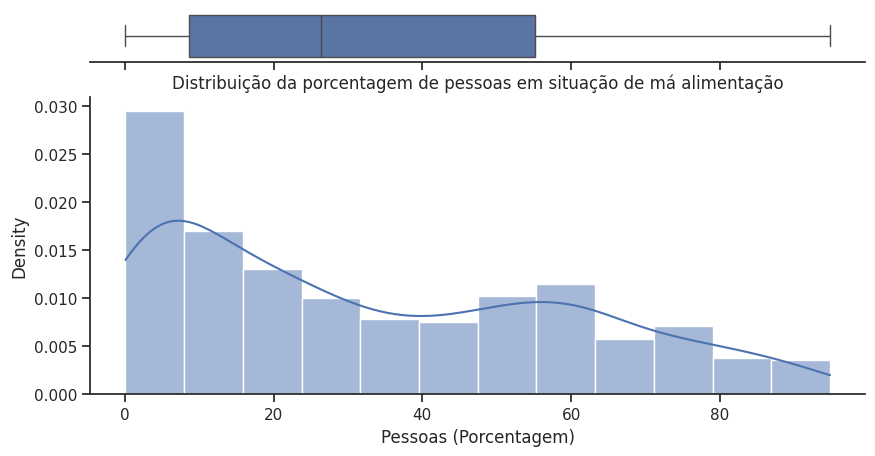

In [ ]:
# Plotando o gráfico de números absoluto de pessoas sem acesso a alimentação saudável
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10, 5), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df_world_percent, x="Value", ax=ax_box)
sns.histplot(data=df_world_percent, x="Value", bins=12, kde=True, stat='density', ax=ax_hist)

# Ajustando o gráfico
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_box.set(yticks=[])
plt.title("Distribuição da porcentagem de pessoas em situação de má alimentação")
plt.xlabel("Pessoas (Porcentagem)")

Também não há presença de outliers.

# Análise Exploratória dos Dados

### 1. Analisando os custos dos alimentos para uma dieta saudavel

In [ ]:
# Nosso dataframe
df_world_cost.head()

,Area,Item,Element,Year Code,Year,Unit,Value,Continente
0,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2017,2017,PPP dollar per person per day,3.04,Europa
1,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2018,2018,PPP dollar per person per day,3.13,Europa
2,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2019,2019,PPP dollar per person per day,3.32,Europa
3,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2020,2020,PPP dollar per person per day,3.40,Europa
4,Albania,Cost of a healthy diet (PPP dollar per person ...,Value,2021,2021,PPP dollar per person per day,3.55,Europa


In [ ]:
# Itens separados
df_world_cost["Item"].unique()

array(['Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats'], dtype=object)

Temos uma métrica geral do custo de uma alimentação saúdavel por pessoa, mas também temos a divisão por tipos de alimentos, o que é uma análise interessante, pois podemos observar as diferenças do preço dos tipos de alimentos por regiões diferentes ao longo dos anos.

Separação dos alimentos pode ser observada por:
- 'Cost of starchy staples' - Custo de alimentos ricos em amido;
- 'Cost of animal source foods' - Custo de alimentos de origem animal;
- 'Cost of legumes, nuts and seeds' - Custo de legumes, nozes e sementes;
- 'Cost of vegetables' - Custo de Vegetais;
- 'Cost of fruits' - Custo de frutas;
- 'Cost of oils and fats' - Custo de óleos e gorduras.

### Custo de uma dieta saudável ao longo dos anos.
Vamos observar os valores diários que uma pessoa gastaria para ter uma dieta saudável ao longo dos anos em cada continente.

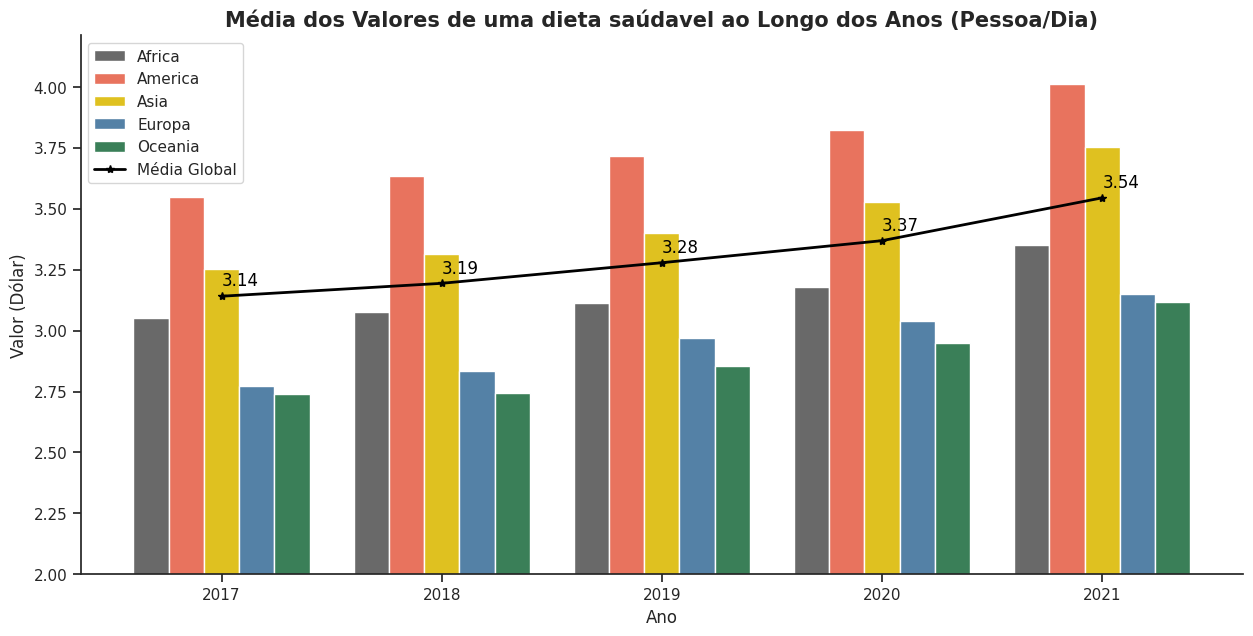

In [ ]:
# Configurando o estilo do gráfico
sns.set(style="ticks")
colors = ['#696969', '#ff6347', '#ffd700', '#4682b4', '#2e8b57']

# Plotando o gráfico
df_cost_heathdiet = df_world_cost[df_world_cost["Item"]=="Cost of a healthy diet (PPP dollar per person per day)"]
df_cost_heathdiet['Year'] = df_cost_heathdiet['Year'].astype(str) # Tive que passar para string para não dar erro no gráfico

plt.figure(figsize=(15, 7))

ax = sns.barplot(data=df_cost_heathdiet,
            y="Value",
            x="Year",
            hue="Continente",
            errorbar=None,
            hue_order=["Africa", "America", "Asia", "Europa", "Oceania"],
            palette=colors)

# Adicionando uma linha para visualizar a média global
global_mean = df_cost_heathdiet.groupby("Year")["Value"].mean().reset_index()
plt.plot(global_mean["Year"], global_mean["Value"],
         color="black", linestyle="-", linewidth=2, label="Média Global", marker="*")

for year, mean_value in zip(global_mean["Year"], global_mean["Value"]):
    plt.text(year, mean_value + 0.1, f'{mean_value:.2f}', ha='left', va='top', color='black')

# Ajustando o gráfico
plt.ylim(2, None)
plt.title("Média dos Valores de uma dieta saúdavel ao Longo dos Anos (Pessoa/Dia)", fontsize=15, fontweight='bold')
plt.ylabel("Valor (Dólar)")
plt.xlabel("Ano")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.legend()
plt.show();

Durante esses anos, notamos um crescimento uniforme do custo da alimentação em todos os continentes. Não há nenhuma grande mudança que possamos destacar em relação a comparação aos continentes.

Agora, olhando os valores globais, podemos notar um acréscimo de 3,14 (2017) para 3,54 (2021), um aumento aproximadamente 12,5% nesses 5 anos.

### Algum tipo de alimento se destaca nesse aumento?

Vamos tentar observar agora se tem algum alimento que se destaca no aumento do custo de uma dieta saudável.

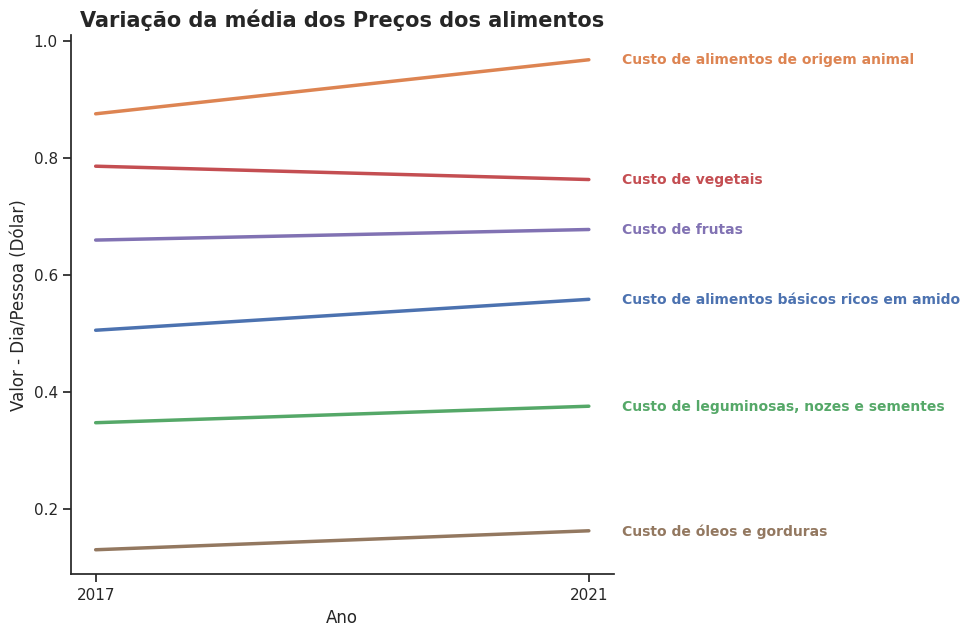

In [ ]:
# Plotando o gráfico

# Ajustes
df_cost_foods = df_world_cost[df_world_cost["Item"] != "Cost of a healthy diet (PPP dollar per person per day)"]
df_cost_foods['Year'] = df_cost_foods['Year'].astype(str) # Tive que passar para string para não dar erro no gráfico
# Traduzindo para melhorar a visualização
traducao_items = {
    'Cost of starchy staples': 'Custo de alimentos básicos ricos em amido',
    'Cost of animal source foods': 'Custo de alimentos de origem animal',
    'Cost of legumes, nuts and seeds': 'Custo de leguminosas, nozes e sementes',
    'Cost of vegetables': 'Custo de vegetais',
    'Cost of fruits': 'Custo de frutas',
    'Cost of oils and fats': 'Custo de óleos e gorduras'
}
# Substituindo os valores na coluna 'Item'
df_cost_foods['Item'] = df_cost_foods['Item'].replace(traducao_items)


plt.figure(figsize=(7, 7))
ax = sns.lineplot(data=df_cost_foods,
            y="Value",
            x="Year",
            hue="Item",
            errorbar=None,
            linewidth=2.5,
            legend=None)

# Adicionando a legenda de cada item em cima da linha de valores
for line, name in zip(plt.gca().get_lines(), df_cost_foods["Item"].unique()):
    y = line.get_ydata()[-1]
    plt.annotate(name, xy=(1, y), xytext=(6, 0), color=line.get_color(),
                 xycoords=plt.gca().get_yaxis_transform(), textcoords="offset points",
                 va="center", fontsize=10, fontweight='bold')

# Ajustando o gráfico
plt.title("Variação da média dos Preços dos alimentos", fontsize=15, fontweight='bold')
plt.ylabel("Valor - Dia/Pessoa (Dólar)")
plt.xlabel("Ano")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Exibindo o gráfico
plt.show()

Ao longo dos cinco anos analisados, o custo dos diferentes tipos de alimentos não apresentou grandes variações. No entanto, vale destacar que os alimentos de origem animal, apesar de já liderarem em termos de preço, foram os que registraram o maior aumento no período. Isso representa um desafio importante, uma vez que esses alimentos são a principal fonte de proteínas em uma dieta equilibrada, tornando-se cada vez mais inacessíveis. Por outro lado, o custo dos vegetais foi a única categoria que apresentou uma redução de preço durante esses anos, o que merece ser ressaltado como uma tendência positiva.

### E o Brasil?

Analisamos a situação global da média do custo de uma dieta saudável e o custo de alimentos de 2017 a 2021, mas tudo em escala global e continental. Vamos observar como está a situação do nosso país em comparação com o resto do mundo.

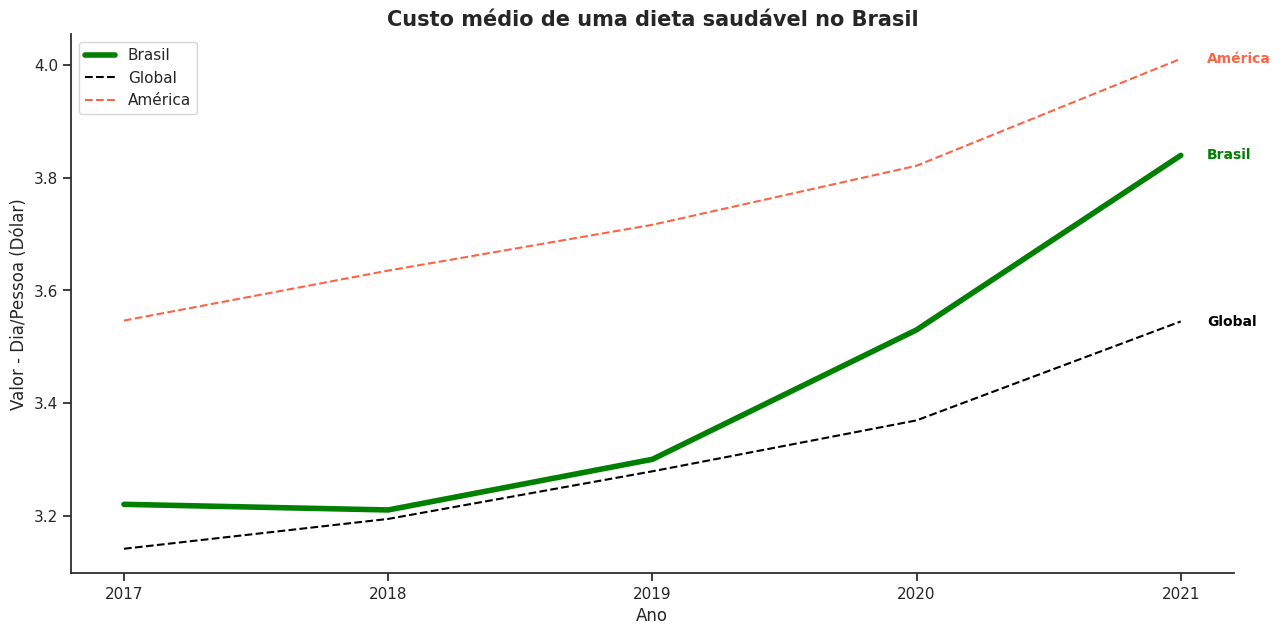

In [ ]:
# Adicionando o gráfico
plt.figure(figsize=(15, 7))

# Plotando o gráfico do Brasil
ax = sns.lineplot(data=df_cost_heathdiet[df_cost_heathdiet["Area"]=="Brazil"],
             x="Year",
             y="Value",
             errorbar=None,
             linewidth=4.0,
             color='green',
             label="Brasil")

# Plotando o gráfico global
ax = sns.lineplot(data=df_cost_heathdiet,
             x="Year",
             y="Value",
             errorbar=None,
             linewidth=1.5,
             label="Global",
             color="black",
             linestyle="--")

# Plotando o gráfico da América
ax = sns.lineplot(data=df_cost_heathdiet[df_cost_heathdiet["Continente"]=="America"],
             x="Year",
             y="Value",
             errorbar=None,
             linewidth=1.5,
             label="América",
             color="#ff6347",
             linestyle="--")

# Adicionando os valores iniciais e finais dos alimentos

# Configurando o gráfico
plt.title("Custo médio de uma dieta saudável no Brasil", fontsize=15, fontweight='bold')
plt.ylabel("Valor - Dia/Pessoa (Dólar)")
plt.xlabel("Ano")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Adicionando o nome das linhas ao final das linhas
for line, name, color in zip(ax.lines, ["Brasil", "Global", "América"], ['green', 'black', '#ff6347']):
    x = line.get_xdata()[-1]
    y = line.get_ydata()[-1]
    plt.text(x + 0.1, y, name, color=color, va='center', ha='left', fontsize=10, fontweight='bold')


# Exibindo o gráfico
plt.show()


O Brasil está acima da média de custo em relação a média mundial. O país teve uma relativa melhora em 2018 e se aproximou dos valores globais, porém, após 2019 os valores se distanciaram novamente de maneira ascentuada. Apesar disso o país se destaca no seu continente, se mantendo abaixo da média de custos de uma boa alimentação.

### 2. Analisando o total de pessoas sem acesso a uma boa alimentação

Vamos observar primeiro os valores totais de pessoas nessa situação.

In [ ]:
# Observando nosso dataframe
df_world_total.head()

,Area,Item,Element,Year Code,Year,Unit,Value,Continente
22,Albania,Number of people unable to afford a healthy di...,Value,2017,2017,million No,0.7,Europa
23,Albania,Number of people unable to afford a healthy di...,Value,2018,2018,million No,0.5,Europa
24,Albania,Number of people unable to afford a healthy di...,Value,2019,2019,million No,0.4,Europa
25,Albania,Number of people unable to afford a healthy di...,Value,2020,2020,million No,0.4,Europa
26,Albania,Number of people unable to afford a healthy di...,Value,2021,2021,million No,0.4,Europa


Aqui vamos analisar o número de pessoas que não conseguem acessar uma dieta saudável. Temos o número absoluto de pessoas de cada país, referentes aos anos de 2017 até 2021.

Vamos observar essa variação ao longo do tempo para cada continente.

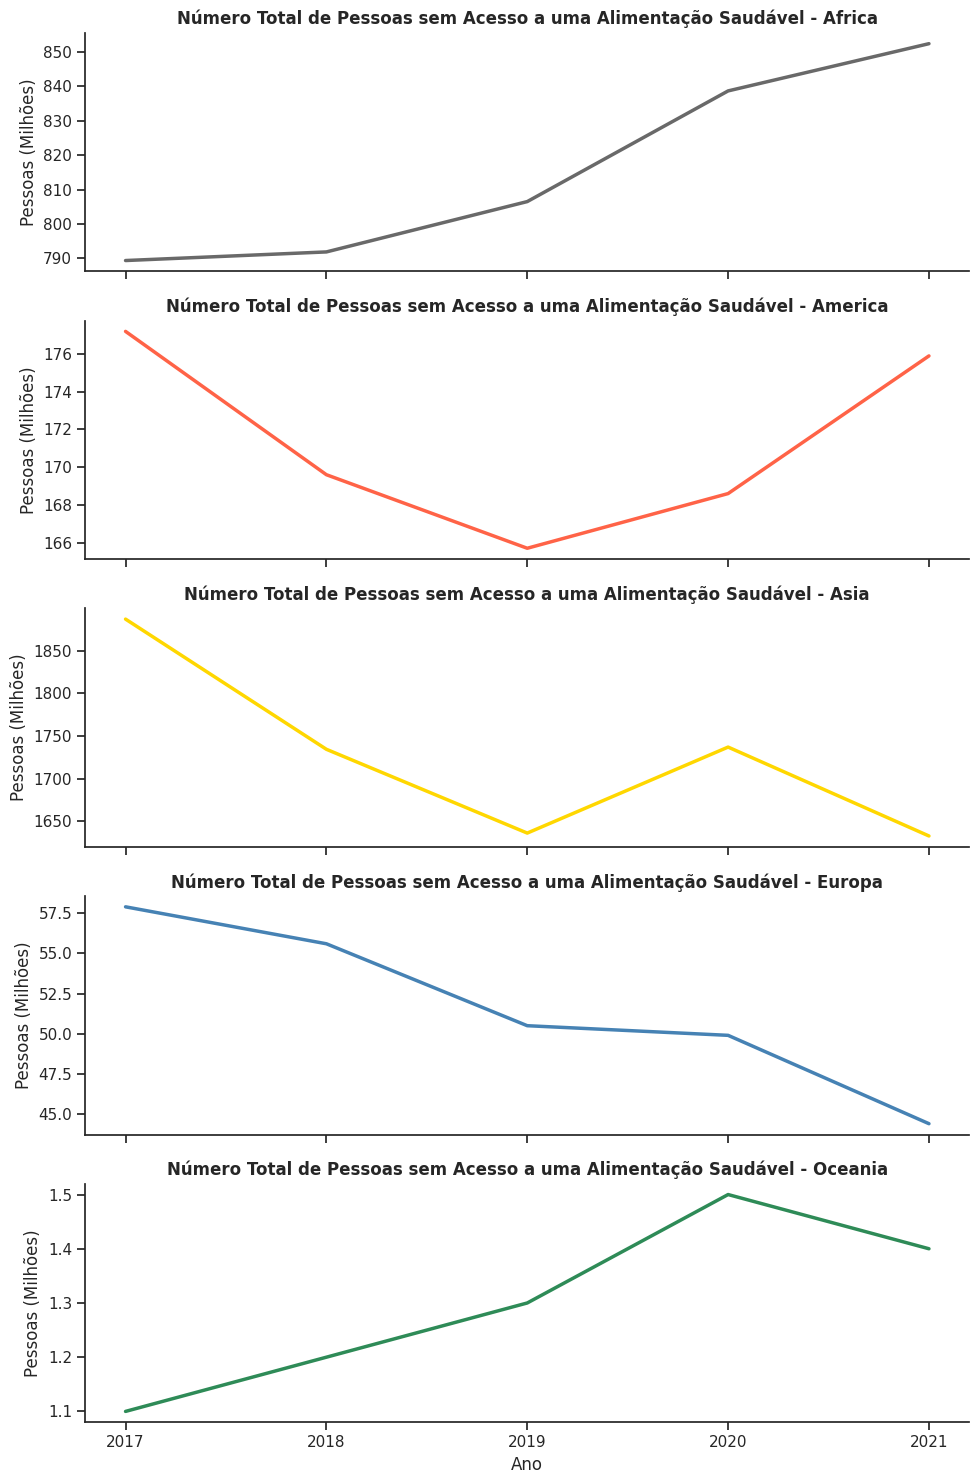

In [ ]:
# Configurando o estilo do gráfico
sns.set(style="ticks")
df_world_total['Year'] = df_world_total['Year'].astype(str) # Tive que passar para string para não dar erro no gráfico

#Parâmetros para fazer o gráfico
colors = ['#696969', '#ff6347', '#ffd700', '#4682b4', '#2e8b57']
continents = ["Africa", "America", "Asia", "Europa", "Oceania"]

# Plotando o gráfico

# Criando uma figura com 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Plotando o gráfico para cada continente
for i, continent in enumerate(continents):
    df_continent = df_world_total[df_world_total["Continente"] == continent]

    # Plotando o gráfico de linhas para o continente atual
    sns.lineplot(data=df_continent,
                 y="Value",
                 x="Year",
                 color=colors[i],
                 linewidth=2.5,
                 ax=axes[i],
                 estimator='sum',
                 errorbar=None)

  # Adicionando título ao subplot
    axes[i].set_title(f'Número Total de Pessoas sem Acesso a uma Alimentação Saudável - {continent}', fontweight='bold')

    # Adicionado legendas
    axes[i].set_ylabel("Pessoas (Milhões)")
    axes[i].set_xlabel("Ano")

    # Removendo as bordas do gráfico
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Separamos os gráficos por continente porque os valores absolutos da população variam significativamente entre eles. Por exemplo, a Ásia tem valores acima de 1,5 bilhão de pessoas, enquanto a Oceania tem valores em torno de 50 milhões. Se todos os dados fossem combinados em um único gráfico, a visualização seria prejudicada, dando a falsa impressão de que alguns continentes não enfrentam problemas de falta de acesso a uma boa dieta, ou que a Ásia teria um problema gigantesco em comparação com os demais. Para uma análise mais precisa, vamos examinar os valores percentuais de cada região mais adiante.

A intenção aqui é observar a evolução desse problema nas diferentes regiões. Algumas observações importantes:

- O número de pessoas sem acesso a uma alimentação adequada na África aumentou consideravelmente nos últimos 5 anos, com um aumento de mais de 60 milhões.

- Na América, a situação é peculiar: houve uma melhora significativa de 2017 a 2019, mas a partir de então piorou, retornando aos valores iniciais.

- A Europa e a Ásia mostraram melhoras positivas, com uma diminuição considerável no número de casos.

- Na Oceania, a situação também é preocupante, com um aumento de aproximadamente 50% até 2020, seguido de uma pequena melhora em 2021.

### Vamos dar uma olhada no Brasil

Text(0.5, 0, 'Ano')

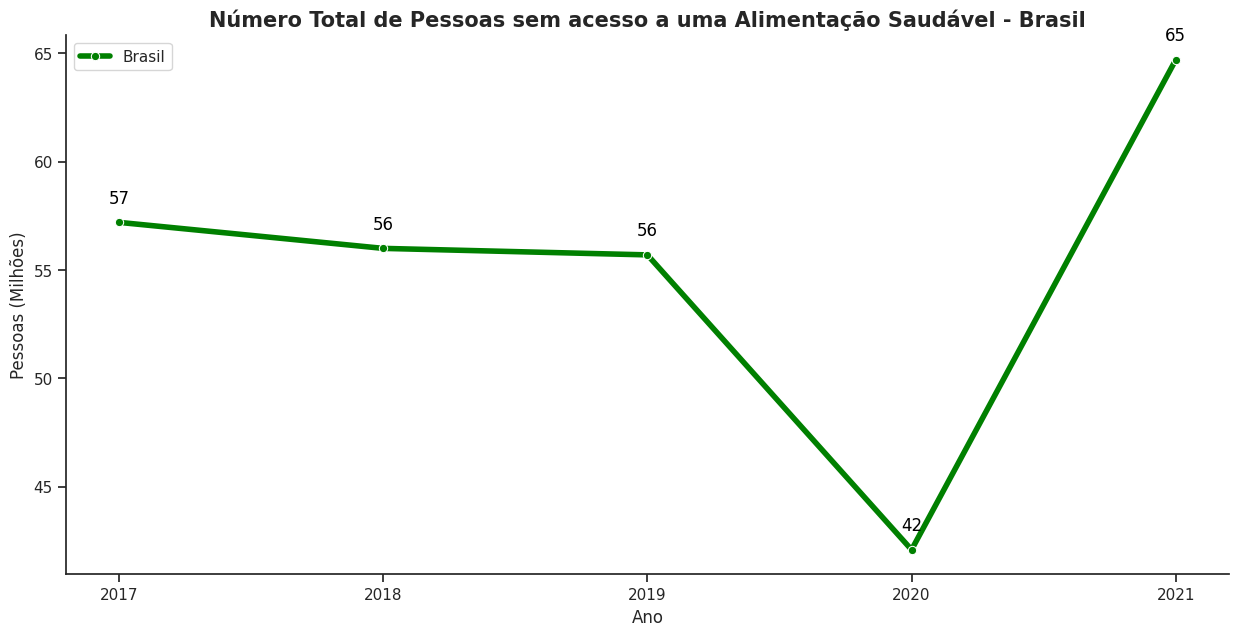

In [ ]:
# Plotando o gráfico para o Brasil
plt.figure(figsize=(15, 7))

ax = sns.lineplot(data=df_world_total[df_world_total["Area"]=="Brazil"],
             x="Year",
             y="Value",
             errorbar=None,
             linewidth=4.0,
             color='green',
             label="Brasil",
             marker='o',
             estimator='sum')

# Colocando os valores nos marcadores
df_brazil_total = df_world_total[df_world_total["Area"] == "Brazil"]
for x, y in zip(df_brazil_total["Year"], df_brazil_total["Value"]):
    plt.text(x, y + 0.7, f'{y:.0f}', ha='center', va='bottom', color='black')

# Configurando o gráfico
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.title("Número Total de Pessoas sem acesso a uma Alimentação Saudável - Brasil", fontsize=15, fontweight='bold')
plt.ylabel("Pessoas (Milhões)")
plt.xlabel("Ano")

O Brasil teve uma grande melhora de 2019 para 2020, porém, no ano de 2021 voltou a piorar consideravelmente, superando o valor dos últimos 5 anos.

### Observando as 10 maiores populações em números absolutos

Vamos visualizar os 10 países com o maior número de pessoas sem acesso a uma dieta de qualidade, para em seguida comparar com os 10 países com a maior proporção relativa de pessoas nessa situação. Isso vai nos permitir destacar a diferença entre o impacto em termos absolutos e em proporção, proporcionando uma visão mais clara sobre a distribuição do problema em diferentes países.

Vamos pegar os valores de 2021



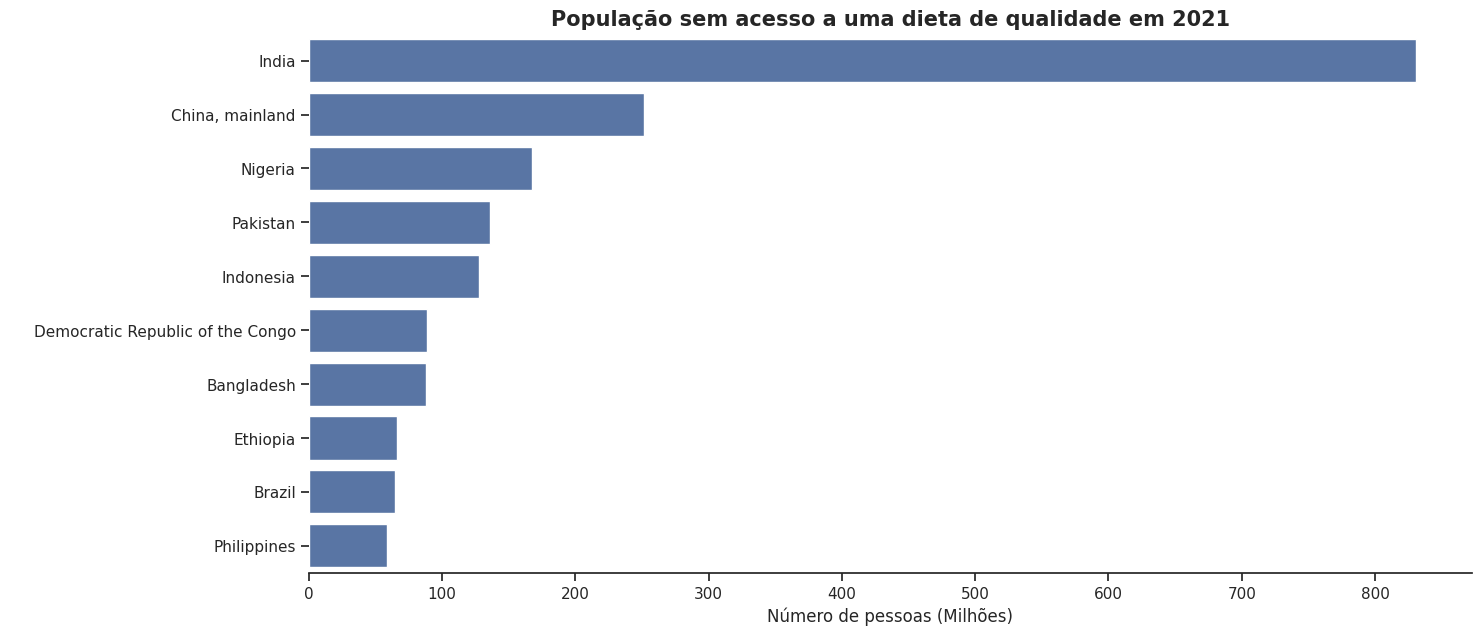

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(15, 7))

# Configurando o gráfico de barras com o ano de 2021
top_10_countries = df_world_total[df_world_total["Year"]=="2021"].nlargest(10, 'Value')
ax = sns.barplot(data=top_10_countries,
                 x="Value",
                 y="Area",
                 estimator="sum",
                 errorbar=None)

# Configurando o gráfico
plt.title("População sem acesso a uma dieta de qualidade em 2021", fontsize=15, fontweight='bold')
plt.xlabel("Número de pessoas (Milhões)")
plt.ylabel(" ")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()


Os 10 países com maior número de pessoas sem acesso a uma dieta de qualidade são: Índia, China, Nigéria, Paquistão, Indonésia, República Democrática do Congo, Bangladesh, Etiópia, Brasil e Filipinas.

É importante destacar que os países que aparecem nessa lista representam grandes populações, principalmente da África e da Ásia. O Brasil também aparece, refletindo a dimensão de sua população. Esses países, devido ao seu tamanho demográfico, inevitavelmente figuram entre os que têm o maior número absoluto de pessoas sem acesso a uma dieta de qualidade.

Para entender melhor a realidade de cada país, é essencial observar os dados de forma proporcional à população.

Vamos fazer isso agora!

### 3. Analisando a proporção de pessoas sem acesso a uma boa alimentação

Essa análise mais detalhada oferece uma visão mais justa sobre a gravidade da situação em cada região e possibilita uma melhor comparação entre países de diferentes tamanhos populacionais, o que é essencial para a definição de estratégias mais eficazes e direcionadas para o combate à insegurança alimentar global.

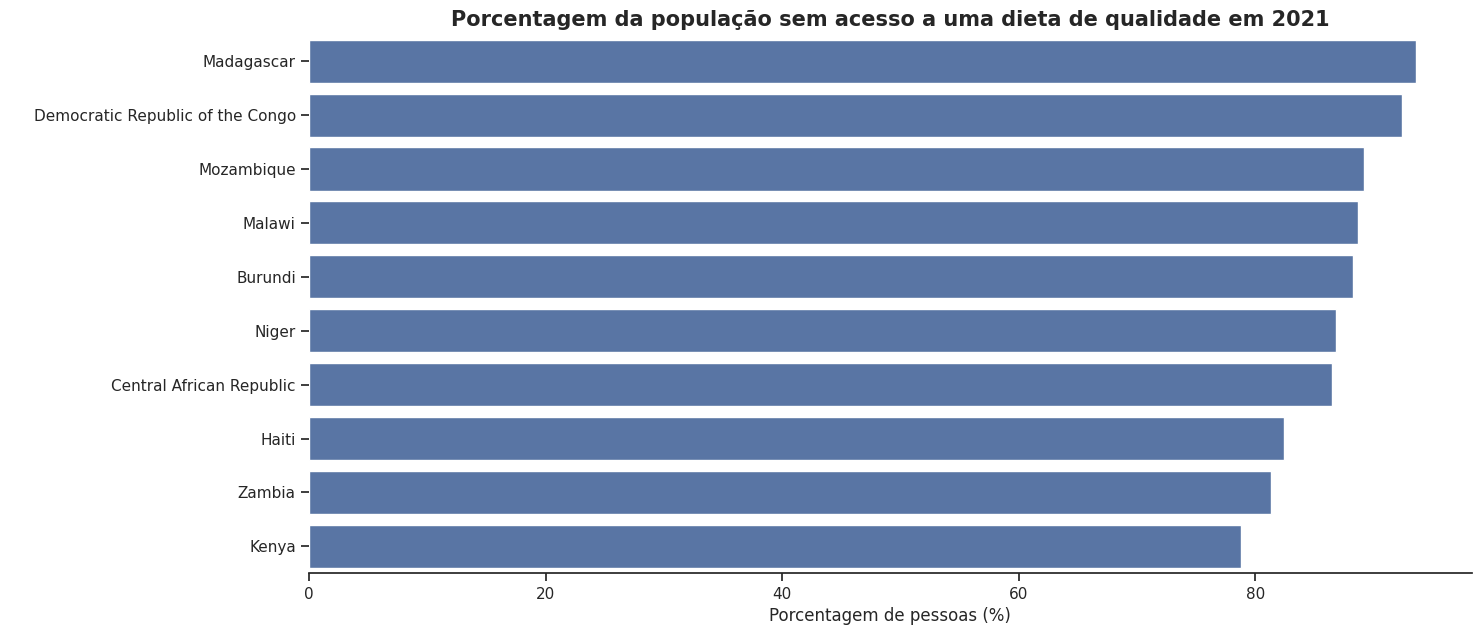

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(15, 7))

# Configurando o gráfico de barras com o ano de 2021
top_10_countries_percent = df_world_percent[df_world_percent["Year"]==2021].nlargest(10, 'Value')
ax = sns.barplot(data=top_10_countries_percent,
                 x="Value",
                 y="Area")

# Configurando o gráfico
plt.title("Porcentagem da população sem acesso a uma dieta de qualidade em 2021", fontsize=15, fontweight='bold')
plt.xlabel("Porcentagem de pessoas (%)")
plt.ylabel(" ")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()

Quando observamos a porcentagem de pessoas sem acesso a uma dieta de qualidade, o cenário muda drasticamente em comparação aos números absolutos. Apenas a República Democrática do Congo aparece em ambas as listas — tanto em números absolutos quanto em porcentagem.

Além da República Democrática do Congo, 9 dos 10 países com maiores porcentagens de sua população nessa situação estão localizados na África. Essa predominância destaca a severidade da crise alimentar no continente africano. Nesses países, com exceção do décimo colocado, todos têm mais de 80% de suas populações sem acesso a uma dieta de qualidade. Isso reflete uma realidade crítica de insegurança alimentar, com milhões de pessoas vulneráveis e expostas a condições de vida inadequadas.

O único país fora da África presente nessa lista é o Haiti, na América Central.

### Agora, vamos analisar os 10 países com as melhores condições

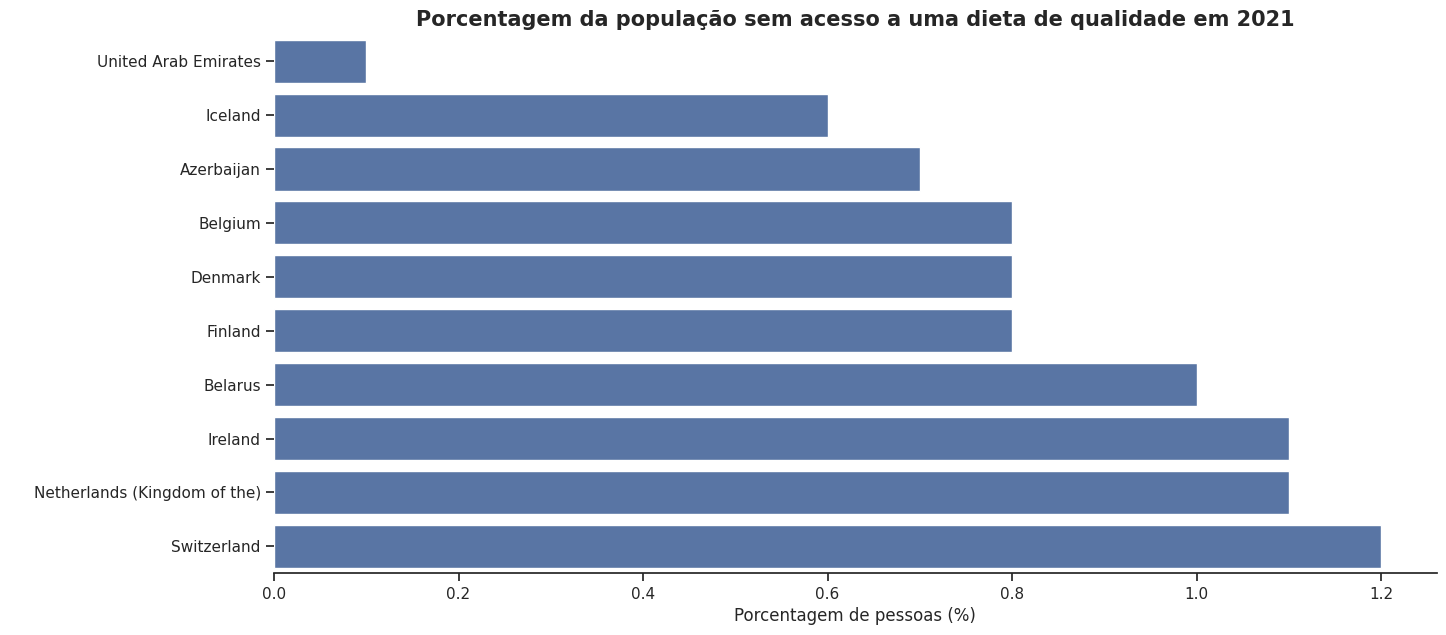

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(15, 7))

# Configurando o gráfico de barras com o ano de 2021
best_10_countries_percent = df_world_percent[df_world_percent["Year"]==2021].nsmallest(10, 'Value')
ax = sns.barplot(data=best_10_countries_percent,
                 x="Value",
                 y="Area")

# Configurando o gráfico
plt.title("Porcentagem da população sem acesso a uma dieta de qualidade em 2021", fontsize=15, fontweight='bold')
plt.xlabel("Porcentagem de pessoas (%)")
plt.ylabel(" ")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.show()

Os resultados do gráfico que mostram os 10 países com menor proporção de pessoas com má alimentação revelam que esses países são, em grande parte, localizados na Europa e em regiões de alta renda. Entre eles, estão países como a Suíça, a Islândia, a Bélgica, a Dinamarca e os Países Baixos, além de outros com economias desenvolvidas, como os Emirados Árabes Unidos. Os 10 resultados apresentam ótimos resultados, com menos de 1,5% da população sofrente com uma má alimentação.

# Conclusão

A análise sobre o custo de uma alimentação saudável no mundo revelou importantes tendências e desafios. Embora o custo dos alimentos não tenha variado drasticamente em termos globais, o aumento significativo no preço dos alimentos de origem animal levanta preocupações, especialmente por serem uma importante fonte de proteínas. Por outro lado, a redução no custo de vegetais é um ponto positivo, indicando uma potencial melhoria no acesso a alimentos saudáveis.

Ao analisarmos o Brasil, constatamos que o país, apesar de estar acima da média global de custo, manteve-se abaixo da média do seu continente, com uma melhora em 2018, seguida de um aumento acentuado nos últimos anos. No entanto, a situação global varia significativamente por regiões e países. A África apresentou o maior crescimento no número de pessoas sem acesso a uma dieta de qualidade, enquanto a Europa e a Ásia mostraram uma melhora contínua.

A comparação entre números absolutos e percentuais reforça a necessidade de olharmos além das grandes populações, destacando que países africanos enfrentam as crises mais severas em termos proporcionais. Por outro lado, países europeus e de alta renda, como Suíça e Emirados Árabes Unidos, têm as menores taxas de insegurança alimentar.

Essas descobertas mostram a necessidade de políticas alimentares regionais e globais mais eficazes, visando garantir o acesso a uma dieta saudável, especialmente em regiões vulneráveis, e um olhar atento à variação no custo de alimentos essenciais ao bem-estar nutricional.